In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorqtl
import matplotlib.pyplot as plt
from tensorqtl import genotypeio, cis, trans
from sklearn.preprocessing import quantile_transform
from sklearn.linear_model import LinearRegression

## Visualizing a cell type proportion QTL

### Myocytes in Skeletal Muscle

In [61]:
snp = 'chr7_232170_C_T_b38'
tissue = 'Muscle_Skeletal'
celltype = 'Myocytes'

Load and wrangle genotypes

In [62]:
plink_prefix_path = "../../data/trans_qtl_calling/gtex/genotypes_filtered/plink." + tissue + ".GOBP_TISSUE_DEVELOPMENT"
pr = genotypeio.PlinkReader(plink_prefix_path)
genotype_df = pr.load_genotypes()
qtl_genotypes = genotype_df.loc[[snp]].transpose()

Mapping files: 100%|██████████| 3/3 [00:00<00:00, 20.20it/s]


Load and wrangle cell type proportion data

In [63]:
proportions_loc="../../data/trans_qtl_calling/gtex/celltype_proportions/proportions-" + tissue + ".txt"
ctprops = pd.read_csv(proportions_loc, sep="\t").set_index('cell_type')
qtl_props = ctprops.loc[[celltype]].transpose()

<Axes: xlabel='chr7_232170_C_T_b38', ylabel='Myocytes'>

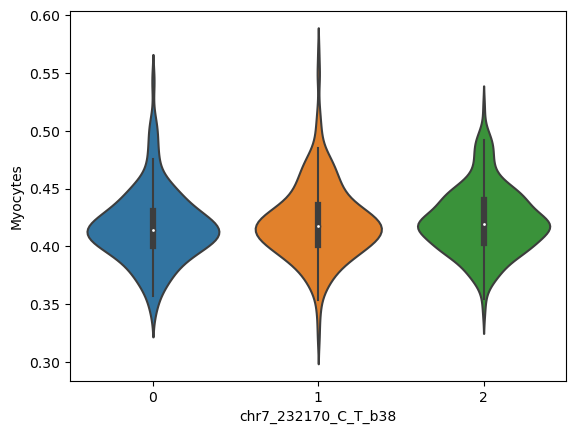

In [64]:
qtl_viz = qtl_genotypes.merge(qtl_props, how='inner', left_index=True, right_index=True)
sns.violinplot(qtl_viz, x=snp, y=celltype)

### Neurons in cerebellum

In [46]:
snp = 'chr2_215441130_C_T_b38'
tissue = 'Brain_Cerebellar_Hemisphere'
celltype = 'Neurons'

In [47]:
plink_prefix_path = "../../data/trans_qtl_calling/gtex/genotypes_filtered/plink." + tissue + ".GOBP_TISSUE_DEVELOPMENT"
pr = genotypeio.PlinkReader(plink_prefix_path)
genotype_df = pr.load_genotypes()
qtl_genotypes = genotype_df.loc[[snp]].transpose()

Mapping files: 100%|██████████| 3/3 [00:00<00:00, 51.61it/s]


In [48]:
proportions_loc="../../data/trans_qtl_calling/gtex/celltype_proportions/proportions-" + tissue + ".txt"
ctprops = pd.read_csv(proportions_loc, sep="\t").set_index('cell_type')
qtl_props = ctprops.loc[[celltype]].transpose()

<Axes: xlabel='chr2_215441130_C_T_b38', ylabel='Neurons'>

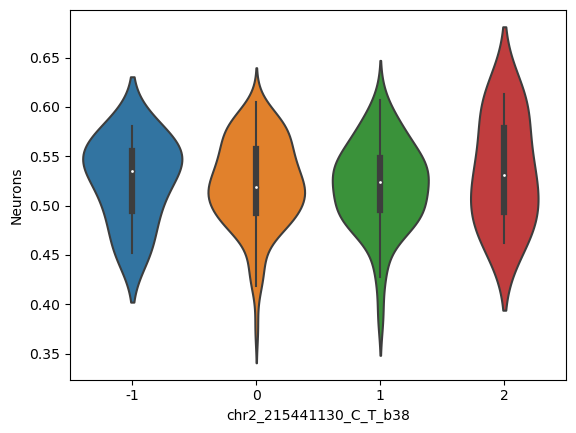

In [49]:
qtl_viz = qtl_genotypes.merge(qtl_props, how='inner', left_index=True, right_index=True)
sns.violinplot(qtl_viz, x=snp, y=celltype)

### Myocytes in Heart Left Ventricle

In [53]:
snp = 'chr11_104157161_C_T_b38'
tissue = 'Heart_Left_Ventricle'
celltype = 'Myocytes'

In [54]:
plink_prefix_path = "../../data/trans_qtl_calling/gtex/genotypes_filtered/plink." + tissue + ".GOBP_TISSUE_DEVELOPMENT"
pr = genotypeio.PlinkReader(plink_prefix_path)
genotype_df = pr.load_genotypes()
qtl_genotypes = genotype_df.loc[[snp]].transpose()

Mapping files: 100%|██████████| 3/3 [00:00<00:00, 204.81it/s]


In [55]:
proportions_loc="../../data/trans_qtl_calling/gtex/celltype_proportions/proportions-" + tissue + ".txt"
ctprops = pd.read_csv(proportions_loc, sep="\t").set_index('cell_type')
qtl_props = ctprops.loc[[celltype]].transpose()

<Axes: xlabel='chr11_104157161_C_T_b38', ylabel='Myocytes'>

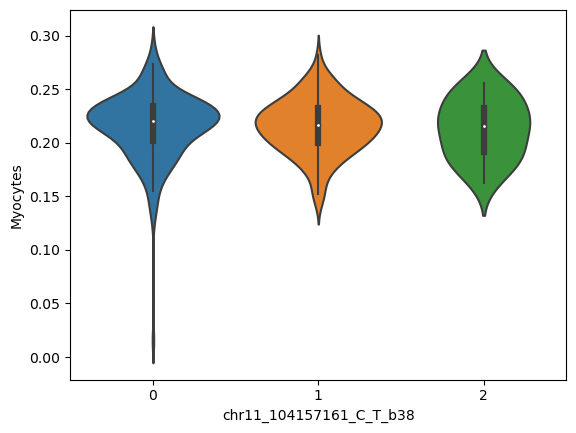

In [56]:
qtl_viz = qtl_genotypes.merge(qtl_props, how='inner', left_index=True, right_index=True)
sns.violinplot(qtl_viz, x=snp, y=celltype)

### Epithelial Cells in Skin

In [57]:
snp = 'chr5_33928797_T_G_b38'
tissue = 'Skin_Not_Sun_Exposed_Suprapubic'
celltype = 'Epithelial_cells'

In [58]:
plink_prefix_path = "../../data/trans_qtl_calling/gtex/genotypes_filtered/plink." + tissue + ".GOBP_TISSUE_DEVELOPMENT"
pr = genotypeio.PlinkReader(plink_prefix_path)
genotype_df = pr.load_genotypes()
qtl_genotypes = genotype_df.loc[[snp]].transpose()

Mapping files: 100%|██████████| 3/3 [00:00<00:00, 28.28it/s]


In [59]:
proportions_loc="../../data/trans_qtl_calling/gtex/celltype_proportions/proportions-" + tissue + ".txt"
ctprops = pd.read_csv(proportions_loc, sep="\t").set_index('cell_type')
qtl_props = ctprops.loc[[celltype]].transpose()

<Axes: xlabel='chr5_33928797_T_G_b38', ylabel='Epithelial_cells'>

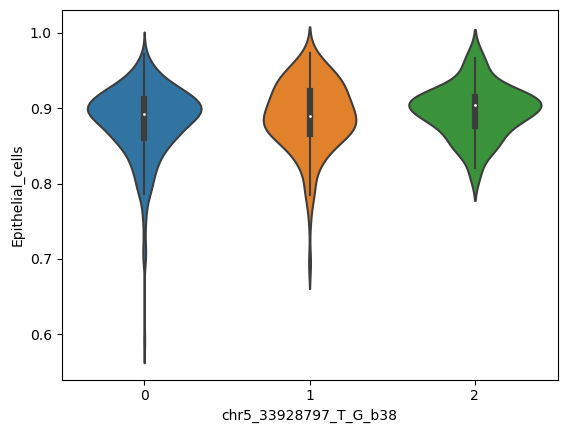

In [60]:
qtl_viz = qtl_genotypes.merge(qtl_props, how='inner', left_index=True, right_index=True)
sns.violinplot(qtl_viz, x=snp, y=celltype)

## Troubleshooting

This looks very wrong, need to understand why these are popping up as strong effects when they don't appear to be

In [75]:
snp = 'chr7_232170_C_T_b38'
tissue = 'Muscle_Skeletal'
celltype = 'Myocytes'

In [76]:
plink_prefix_path = "../../data/trans_qtl_calling/gtex/genotypes_filtered/plink." + tissue + ".GOBP_TISSUE_DEVELOPMENT"
pr = genotypeio.PlinkReader(plink_prefix_path)
genotype_df = pr.load_genotypes()
qtl_genotypes = genotype_df.loc[[snp]]

Mapping files: 100%|██████████| 3/3 [00:00<00:00, 329.25it/s]


In [77]:
proportions_loc="../../data/trans_qtl_calling/gtex/celltype_proportions/proportions-" + tissue + ".txt"
ctprops = pd.read_csv(proportions_loc, sep="\t").set_index('cell_type')
qtl_props = ctprops.loc[[celltype]]

In [80]:
donors_inc = qtl_genotypes.columns.intersection(qtl_props.columns)
qtl_genotypes = qtl_genotypes.loc[:, donors_inc]
qtl_props = qtl_props.loc[:, donors_inc]

In [81]:
trans.map_trans(genotype_df=qtl_genotypes, 
                phenotype_df=qtl_props,
                pval_threshold=1, maf_threshold=0.05,
                batch_size=20000)

trans-QTL mapping
  * 705 samples
  * 1 phenotypes
  * 1 variants
    processing batch 1/1
    elapsed time: 0.00 min
  * 1 variants passed MAF >= 0.05 filtering
done.


,variant_id,phenotype_id,pval,b,b_se,af
0,chr7_232170_C_T_b38,Myocytes,0.117373,0.002533,0.001616,0.580142


#### Evaluating the impact of normalization

In [83]:
qtl_props_norm = quantile_transform(qtl_props, axis=1, output_distribution='normal')
qtl_props_norm = pd.DataFrame(qtl_props_norm, index=qtl_props.index, columns=qtl_props.columns)

/home/jpopp/.conda/envs/tensorqtl/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (705). n_quantiles is set to n_samples.
  warnings.warn(


In [84]:
trans.map_trans(genotype_df=qtl_genotypes, 
                phenotype_df=qtl_props_norm,
                pval_threshold=1, maf_threshold=0.05,
                batch_size=20000)

trans-QTL mapping
  * 705 samples
  * 1 phenotypes
  * 1 variants
    processing batch 1/1
    elapsed time: 0.00 min
  * 1 variants passed MAF >= 0.05 filtering
done.


,variant_id,phenotype_id,pval,b,b_se,af
0,chr7_232170_C_T_b38,Myocytes,0.074854,0.095452,0.053504,0.580142


#### Evaluating the impact of including covariates

In [85]:
covariates_file = "../../data/trans_qtl_calling/gtex/covariates/" + tissue + ".v8.covariates.txt"
covariates_df = pd.read_csv(covariates_file, sep='\t', index_col=0).T.loc[donors_inc, :]

In [86]:
trans.map_trans(genotype_df=qtl_genotypes, 
                phenotype_df=qtl_props_norm,
                covariates_df=covariates_df,
                pval_threshold=1, maf_threshold=0.05,
                batch_size=20000)

trans-QTL mapping
  * 705 samples
  * 1 phenotypes
  * 68 covariates
  * 1 variants
    processing batch 1/1
    elapsed time: 0.00 min
  * 1 variants passed MAF >= 0.05 filtering
done.


,variant_id,phenotype_id,pval,b,b_se,af
0,chr7_232170_C_T_b38,Myocytes,0.001109,0.104676,0.031949,0.580142


In [101]:
props_fitted = LinearRegression().fit(covariates_df, qtl_props.transpose())
props_residuals = qtl_props.transpose().values - props_fitted.predict(covariates_df)

genotypes_fitted = LinearRegression().fit(covariates_df, qtl_genotypes.transpose())
genotypes_residuals = qtl_genotypes.transpose().values - genotypes_fitted.predict(covariates_df)

In [108]:
qtl_viz['genotype_residuals']=genotypes_residuals
qtl_viz['props_residuals']=props_residuals
qtl_viz

,chr7_232170_C_T_b38,Myocytes,genotype_residuals,props_residuals
GTEX-111CU,1,0.4088,-0.077148,0.010316
GTEX-111FC,0,0.4245,-1.157341,0.004229
GTEX-111VG,1,0.4551,-0.228386,-0.001250
GTEX-111YS,1,0.4079,-0.233917,0.008168
GTEX-1122O,2,0.3923,0.954312,-0.016701
...,...,...,...,...
GTEX-ZYW4,1,0.3863,0.147511,-0.014902
GTEX-ZYY3,2,0.4610,0.516363,0.017972
GTEX-ZZ64,0,0.3676,-1.218716,-0.007248
GTEX-ZZPT,0,0.3448,-0.834907,-0.058995


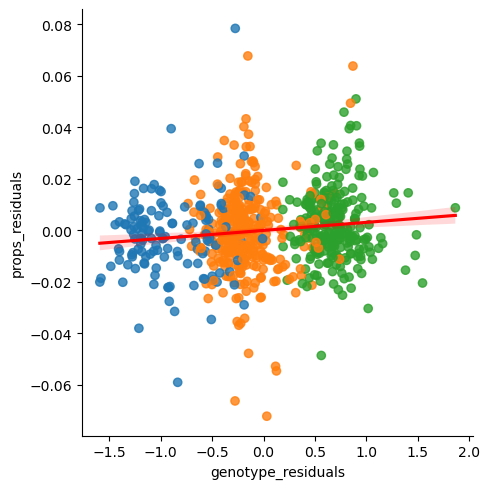

In [117]:
snp_palette = {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c'}
snp_cols = [snp_palette[val] for val in qtl_viz['chr7_232170_C_T_b38']]
sns.lmplot(qtl_viz, x='genotype_residuals', y='props_residuals', scatter_kws={'color': snp_cols}, line_kws={'color': 'red'})